# Uvod u Seaborn Biblioteku

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236 
**Datum:** 23.07.2025.

---

### 1. **Šta je Seaborn?**

> **Zvanična dokumentacija:** [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

Seaborn je **moderna Python biblioteka** za statističku vizualizaciju podataka, izgrađena na vrhu matplotlib-a. Razvio ju je Michael Waskom 2012. godine kao visoko-nivo interfejs za kreiranje atraktivnih i informativnih statističkih grafika. Zeleo je da omoguci korisnicima da sa sto manje koda dobiju profesionalne grafikone, sa automatskim stilizovanjem i naprednim statistickim mogucnostima. 
Posebno je popularan u **Data Science** zajednici.

### **Glavne karakteristike Seaborn-a:**

- **Visoko-nivo interfejs**: Jednostavniji API za rad sa podacima
- **Statistička orijentacija**: Ugrađene funkcije za statističku analizu i vizualizaciju
- **Integracija sa pandas**: Odličo radi sa DataFrame objektima
- **Estetika**: Unapređeni izgled u odnosu na matplotlib
- **Fleksibilnost**: Mogućnost podešavanja kroz matplotlib

---


In [21]:
# Uvoz potrebnih biblioteka
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 2. Matplotlib vs Seaborn:

Matplotlib je osnovna biblioteka za vizualizaciju, ali zahteva više koda i ručno podešavanje za dobijanje lepih grafika. Seaborn koristi matplotlib u pozadini, ali omogućava mnogo jednostavnije i brže kreiranje profesionalnih grafika.

- Kreirajmo set podataka za demonstraciju i uporedimo kako isti grafikon izgleda u matplotlib-u i seaborn-u.

In [22]:
# Kreiranje uzornih podataka za demonstraciju
np.random.seed(42)

# Generisanje podataka o prodaji različitih proizvoda u različitim mesecima
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
products = ['Laptop', 'Telefon', 'Tablet']

# Kreiranje realistnih podataka o prodaji
data = []
for product in products:
    for month in months:
        # Dodavanje sezonalnosti i trends
        base_sales = np.random.normal(100, 20)
        if month in ['Dec', 'Jan', 'Feb']:  # Zimski rast
            base_sales *= 1.3
        elif month in ['Jun', 'Jul', 'Aug']:  # Letnji pad
            base_sales *= 0.8
        
        # Različiti proizvodi imaju različite prodajne karakteristike
        if product == 'Laptop':
            base_sales *= 1.5
        elif product == 'Telefon':
            base_sales *= 2.0
        
        data.append({
            'Mesec': month,
            'Proizvod': product,
            'Prodaja': max(0, int(base_sales)),
            'Profit': max(0, int(base_sales * np.random.uniform(0.1, 0.3)))
        })

# Kreiranje DataFrame-a
df = pd.DataFrame(data)
print("Kreiran DataFrame sa podacima o prodaji:")
print(df.head(10))
print(f"\nDimenzije DataFrame-a: {df.shape}")
print(f"\nOsnovne statistike:")
print(df.describe())


Kreiran DataFrame sa podacima o prodaji:
  Mesec Proizvod  Prodaja  Profit
0   Jan   Laptop      214      52
1   Feb   Laptop      189      41
2   Mar   Laptop      142      15
3   Apr   Laptop      142      39
4   May   Laptop      197      20
5   Jun   Laptop      138      40
6   Jul   Laptop      108      14
7   Aug   Laptop      133      18
8   Sep   Laptop      157      29
9   Oct   Laptop       92      14

Dimenzije DataFrame-a: (36, 4)

Osnovne statistike:
          Prodaja     Profit
count   36.000000  36.000000
mean   152.833333  28.083333
std     57.878938  13.974211
min     73.000000   8.000000
25%    111.000000  17.000000
50%    144.000000  27.500000
75%    180.750000  39.000000
max    336.000000  68.000000


### Prikaz razlike grafikona izmedju matplotlib-a i seaborn-a

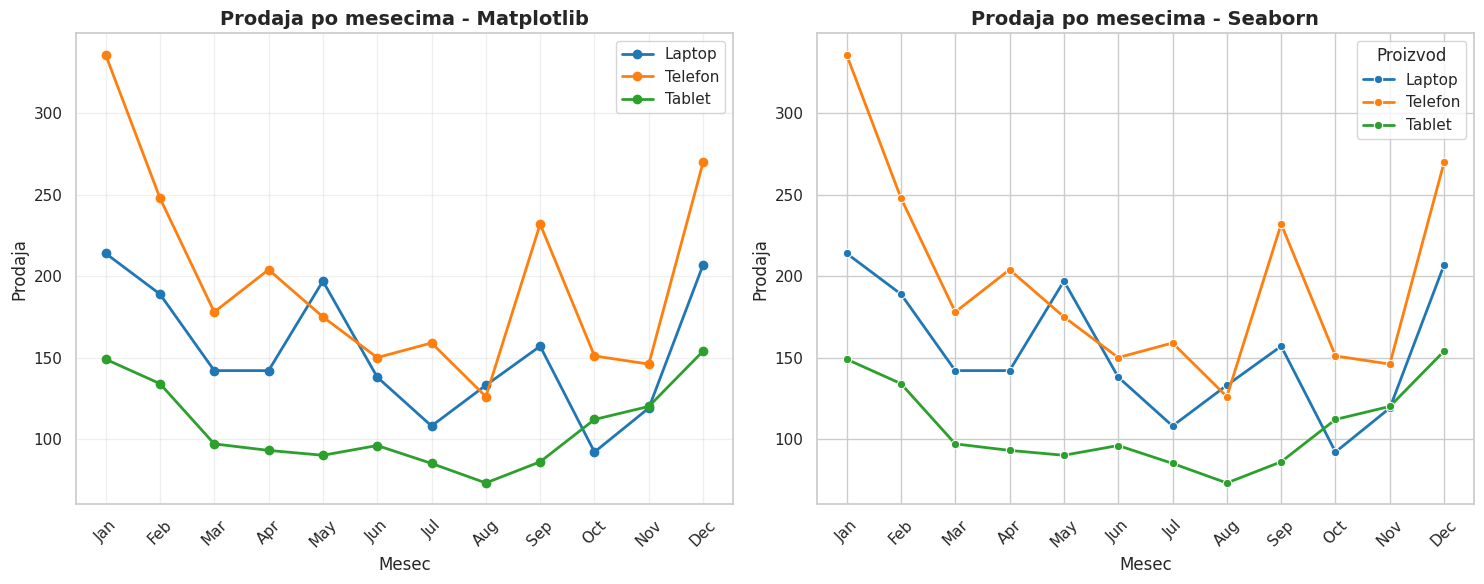

In [23]:
# Poređenje matplotlib-a i seaborn-a
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# MATPLOTLIB pristup
ax1 = axes[0]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i, product in enumerate(products):
    product_data = df[df['Proizvod'] == product]
    ax1.plot(product_data['Mesec'], product_data['Prodaja'], 
             marker='o', color=colors[i], linewidth=2, label=product)

ax1.set_title('Prodaja po mesecima - Matplotlib', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mesec')
ax1.set_ylabel('Prodaja')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# SEABORN pristup
ax2 = axes[1]
sns.lineplot(data=df, x='Mesec', y='Prodaja', hue='Proizvod', 
             marker='o', linewidth=2, ax=ax2)
ax2.set_title('Prodaja po mesecima - Seaborn', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Prednosti Seaborn-a u ovom primeru:

1. **Manje koda**: Jedna linija umesto petlje
2. **Bolje default settings**: Automatsko grupisanje po 'hue' parametru
3. **Bolje default boje i stil**
4. **Automatska legenda**
5. **Rad sa kategorijskim podacima**: Bolje rukovanje kategorijskim varijablama
---

## 3. Seaborn stilovi i teme

Seaborn omogućava lako menjanje izgleda grafika kroz različite stilove i kontekste. Ovo je jedna od glavnih prednosti u odnosu na matplotlib.


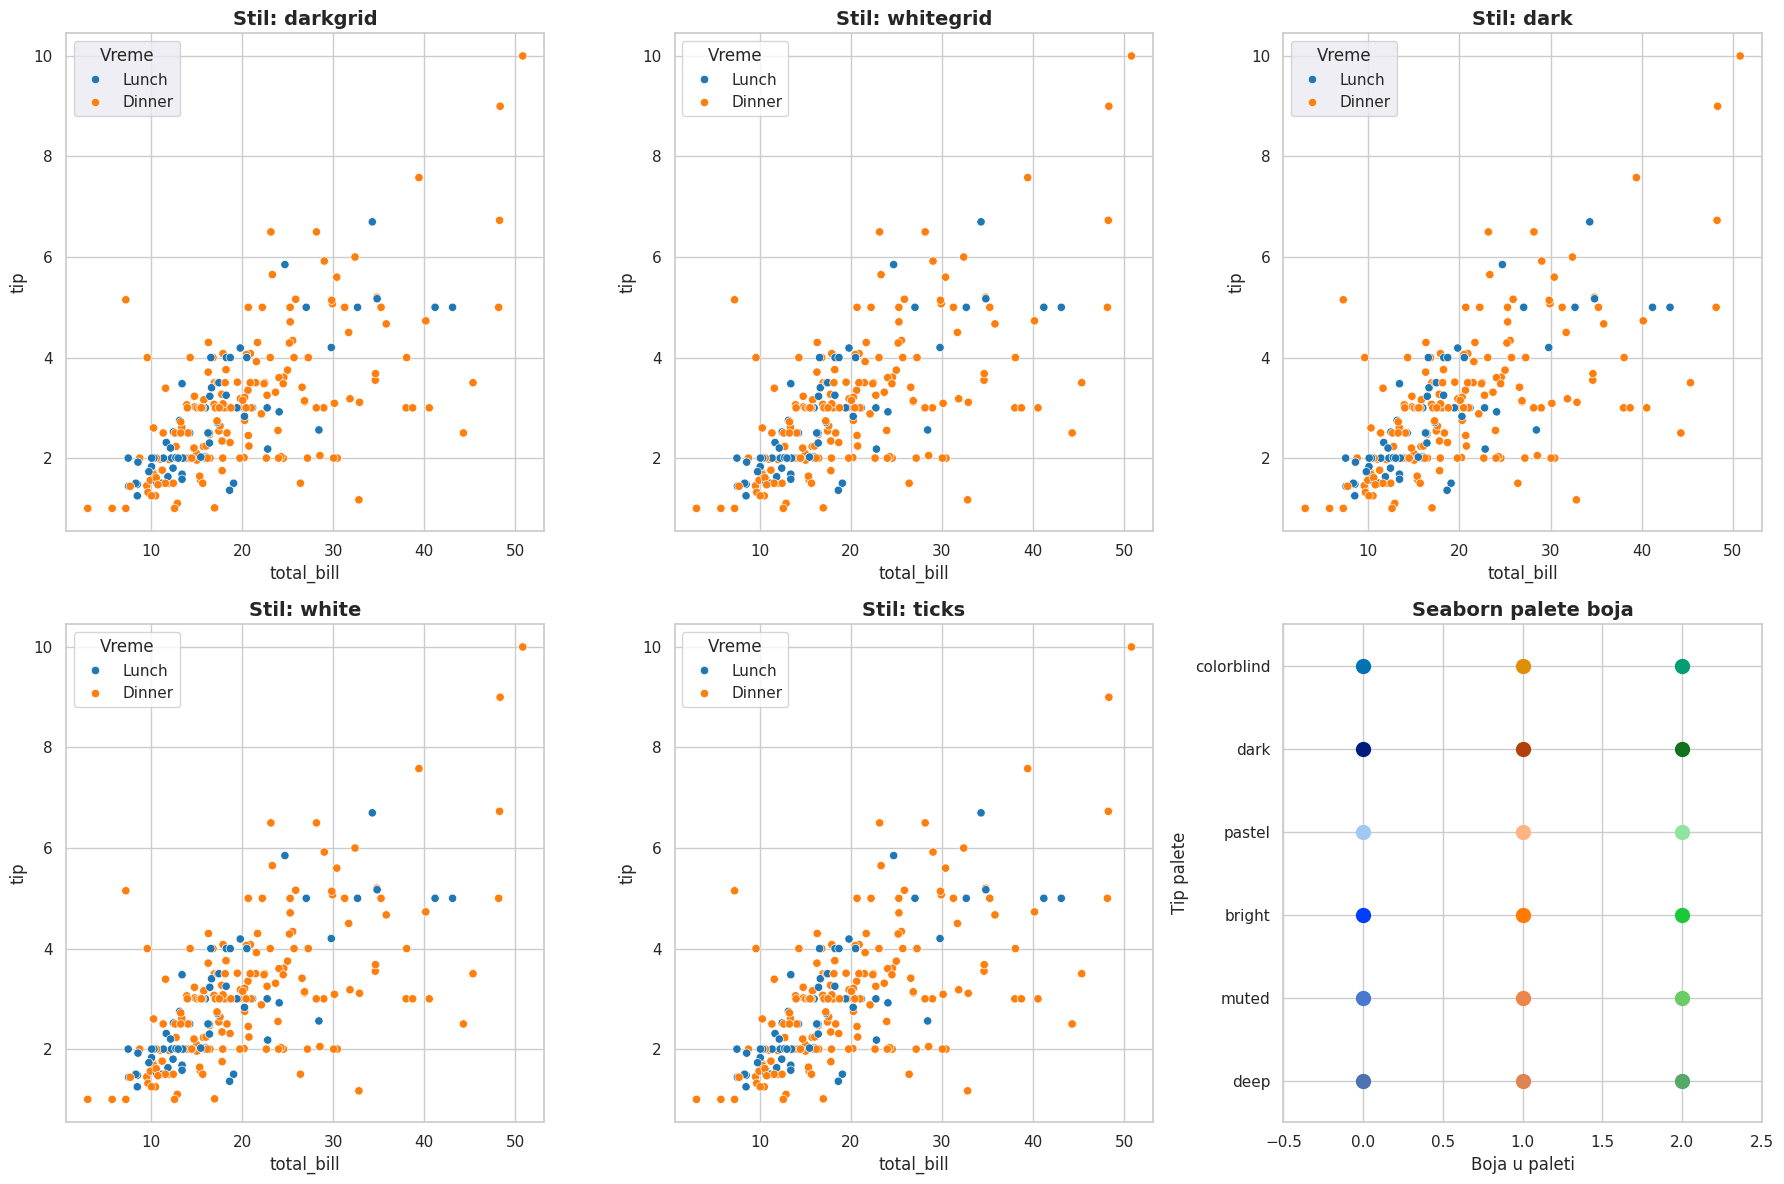

In [24]:
# Demonstracija različitih seaborn stilova
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, style in enumerate(styles):
    sns.set_style(style)
    ax = axes[i]
    
    # Kreiranje istog grafikona u različitim stilovima
    sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=ax)
    ax.set_title(f'Stil: {style}', fontsize=14, fontweight='bold')
    ax.legend(title='Vreme')

# Poslednji subplot - prikaz paleta
ax = axes[5]
sns.set_style('whitegrid')

# Prikaz različitih paleta
palettes = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']
for i, palette in enumerate(palettes):
    colors = sns.color_palette(palette, n_colors=3)
    for j, color in enumerate(colors):
        ax.scatter(j, i, c=[color], s=100, label=f'{palette}' if j == 0 else '')
        
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, len(palettes) - 0.5)
ax.set_xlabel('Boja u paleti')
ax.set_ylabel('Tip palete')
ax.set_title('Seaborn palete boja', fontsize=14, fontweight='bold')
ax.set_yticks(range(len(palettes)))
ax.set_yticklabels(palettes)

plt.tight_layout()
plt.show()

# Vraćanje na default stil
sns.set_style('whitegrid')


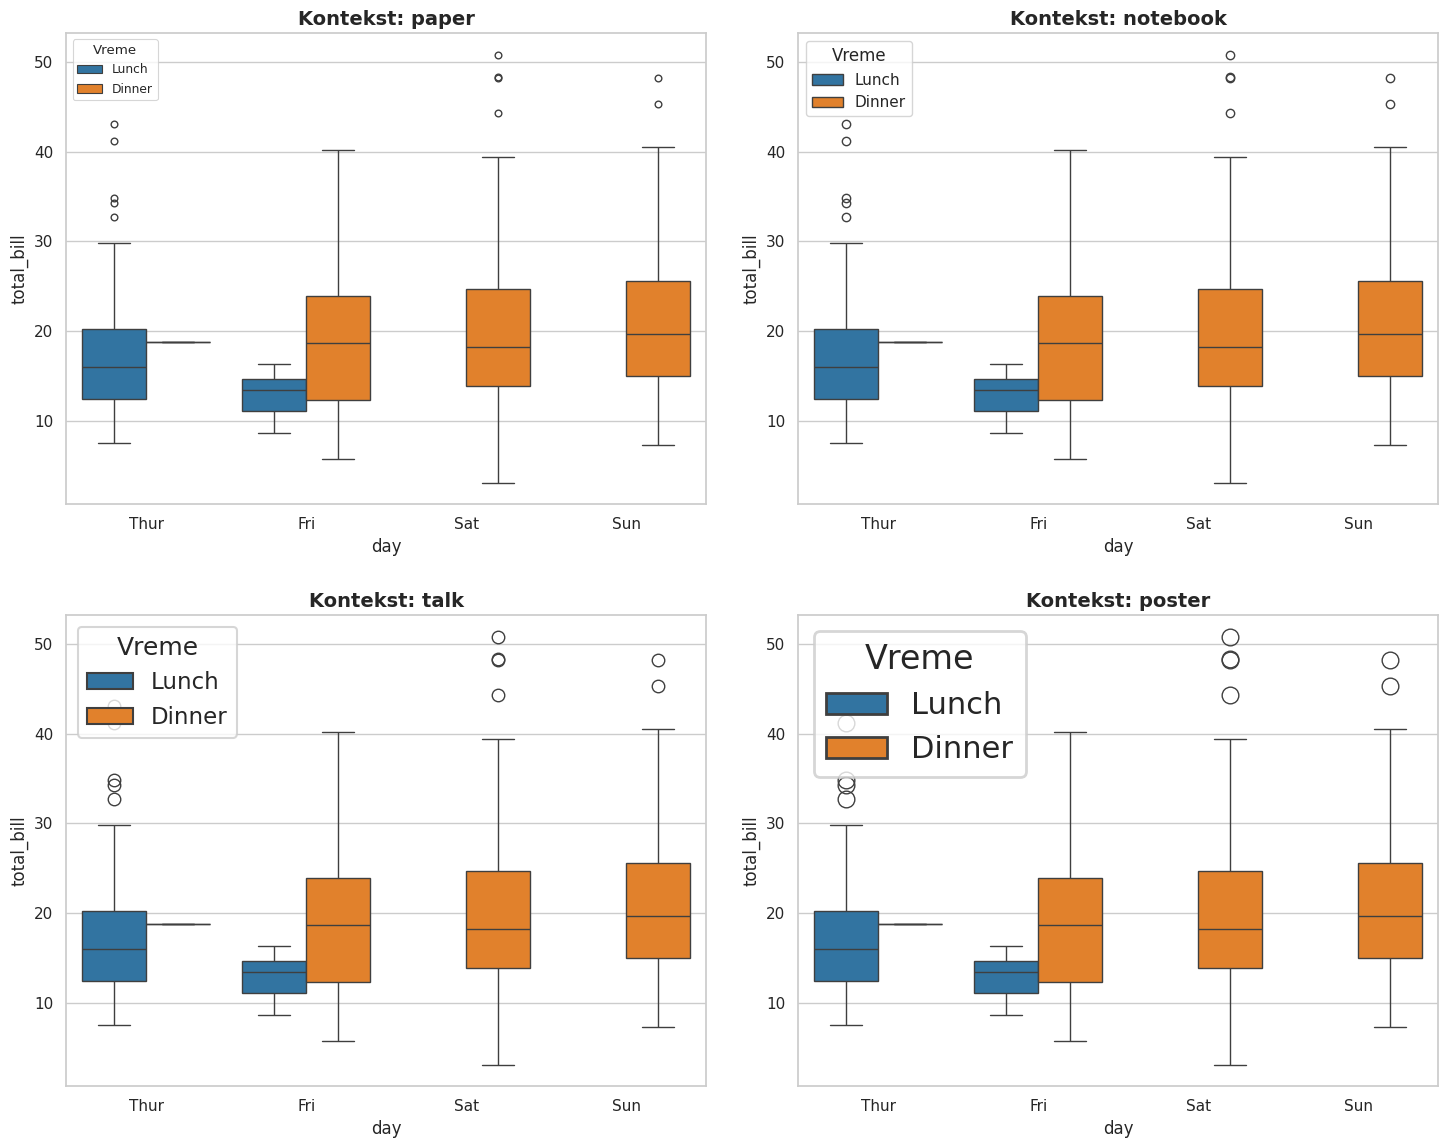

KONTEKSTI U SEABORN-U:
1. paper - za naučne radove (mali font)
2. notebook - za jupyter notebook (default)
3. talk - za prezentacije
4. poster - za postere (veliki font)


In [25]:
# Demonstracija različitih konteksta (scaling)
contexts = ['paper', 'notebook', 'talk', 'poster']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, context in enumerate(contexts):
    sns.set_context(context)
    ax = axes[i]
    
    # Kreiranje istog grafikona u različitim kontekstima
    sns.boxplot(data=tips, x='day', y='total_bill', hue='time', ax=ax)
    ax.set_title(f'Kontekst: {context}', fontsize=14, fontweight='bold')
    ax.legend(title='Vreme')

plt.tight_layout()
plt.show()

# Vraćanje na default kontekst
sns.set_context('notebook')

print("KONTEKSTI U SEABORN-U:")
print("1. paper - za naučne radove (mali font)")
print("2. notebook - za jupyter notebook (default)")
print("3. talk - za prezentacije")
print("4. poster - za postere (veliki font)")


## 4. Zaključak

U ovom notebook-u smo prošli kroz osnovne koncepte Seaborn biblioteke:

### Što smo naučili:
- **Definiciju i svrhu** Seaborn biblioteke
- **Prednosti** u odnosu na matplotlib
- **Praktične primere** poređenja sa matplotlib-om
- **Stilove i teme** za lepši izgled grafika
- **Kontekste** za različite namene

### Ključne prednosti Seaborn-a:
1. **Jednostavnost** - manje koda za kompleksne grafike
2. **Estetika** - automatski lepi grafikoni
3. **Statistička orijentacija** - ugrađene statističke funkcije
4. **Integracija** - odličo radi sa pandas
5. **Fleksibilnost** - može se kombinovati sa matplotlib

### Sledeći koraci:
U narednim notebook-ima ćemo detaljno istražiti:
- Specifične plotting funkcije
- Strukture podataka za seaborn
- Objektno-orijentisani interfejs
- Napredne statistické vizualizacije

---

**Napomena**: Ovaj notebook služi kao uvod u seaborn. Za dublje razumevanje, proučite naredne notebook-ove u seriji.
